회귀 계수: a = 0.2563
절편: b = 1375.6667
결정계수 R²: 0.9492


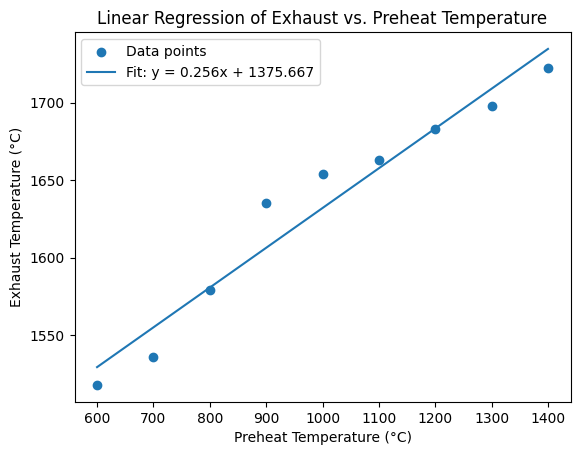

In [11]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 데이터 로드
df = pd.read_excel('data.xlsx', header=None, names=['T_pre', 'T_ex'])

# 입력 및 출력 배열 준비
X = df['T_pre'].values.reshape(-1, 1)  # 독립 변수: 예열공기 온도
y = df['T_ex'].values                  # 종속 변수: 배기가스 온도

# 모델 객체 생성 및 학습
model = LinearRegression()
model.fit(X, y)



# 회귀선 예측값 생성
x_range = np.linspace(df['T_pre'].min(), df['T_pre'].max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# 결과 확인
a = model.coef_[0]       # 기울기
b = model.intercept_     # 절편
r2 = model.score(X, y)   # 결정계수

print(f"회귀 계수: a = {a:.4f}")
print(f"절편: b = {b:.4f}")
print(f"결정계수 R²: {r2:.4f}")

# 그래프 그리기
plt.figure()
plt.scatter(df['T_pre'], df['T_ex'], label='Data points')
plt.plot(x_range.flatten(), y_pred, label=f'Fit: y = {model.coef_[0]:.3f}x + {model.intercept_:.3f}')
plt.xlabel('Preheat Temperature (°C)')
plt.ylabel('Exhaust Temperature (°C)')
plt.title('Linear Regression of Exhaust vs. Preheat Temperature')
plt.legend()
plt.show()